<a href="https://colab.research.google.com/github/abhijit8324/Capstone-Projects/blob/main/EDA_on_Online_Course_Enrollment_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Online Course Enrollment Data**


## Objectives

* Identify keywords in course titles using a WordCloud
* Calculate the summary statistics and visualizations of the online course content dataset
* Determine popular course genres
* Calculate the summary statistics and create visualizations of the online course enrollment dataset
* Identify courses with the greatest number of enrolled students

In [ ]:
# installing required python packages

!pip install seaborn
!pip install wordcloud
!pip install pandas
!pip install matplotlib

In [ ]:
# import necessary class/methods in the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [ ]:
# set a random state
rs = 123

### Load and explore the dataset

First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.

In [ ]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

In [ ]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [ ]:
# We will start by exploring the course genre dataset. Let's first check its columns/features name:

course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.

In [ ]:
# We can also check how many unique courses we have in this dataset:

course_df.shape[0]

307

In [ ]:
# header rows
course_df.head()


,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
course_df.dtypes

,0
COURSE_ID,object
TITLE,object
Database,int64
Python,int64
CloudComputing,int64
DataAnalysis,int64
Containers,int64
MachineLearning,int64
ComputerVision,int64
DataScience,int64


As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.

For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [ ]:
course_df.iloc[1, ]

,1
COURSE_ID,ML0122EN
TITLE,accelerating deep learning with gpu
Database,0
Python,1
CloudComputing,0
DataAnalysis,0
Containers,0
MachineLearning,1
ComputerVision,0
DataScience,1


Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


### Plot a Word Cloud from Course Titles
First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [ ]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [ ]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

In [ ]:
# filter common stop words and some less meaningful words:

# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [ ]:
# create a ```WordCloud``` object and generate ```wordcloud``` from the titles.

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [ ]:
wordcloud.generate(titles)

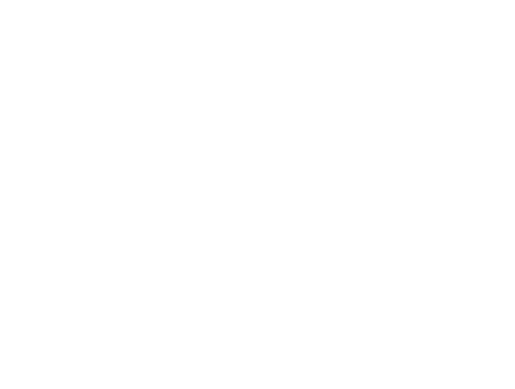

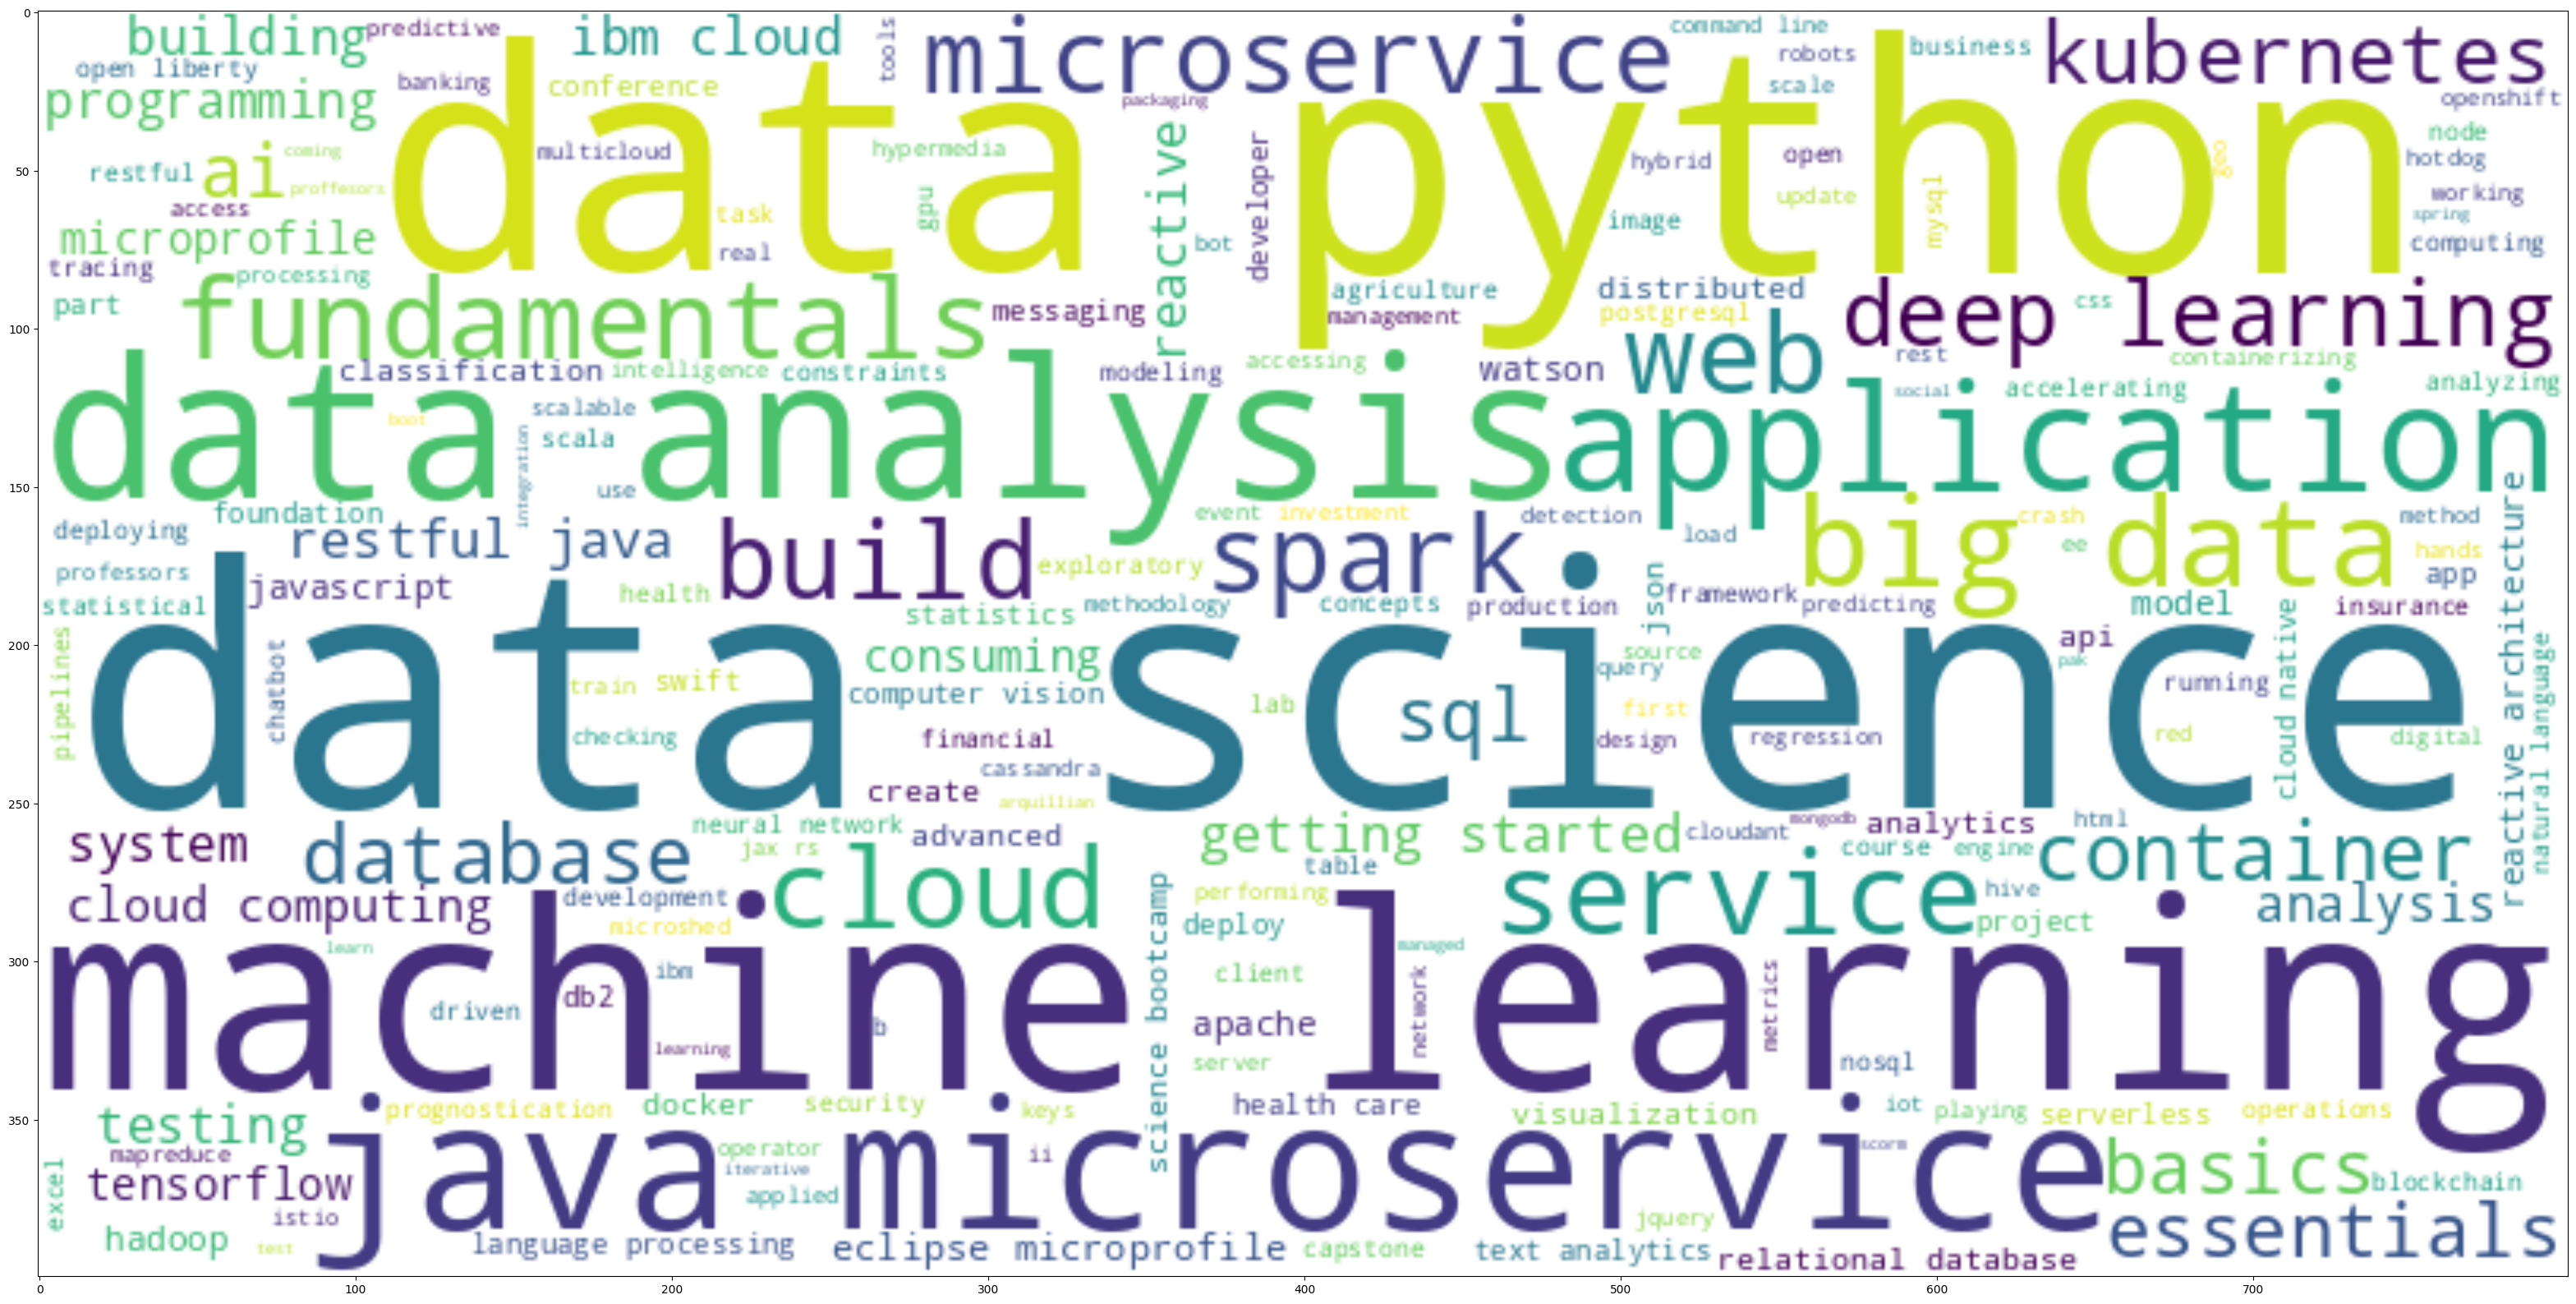

In [ ]:
# use `plt.imshow()` method to visualize the generated wordcloud:

# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

As we can see from the wordcloud, there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.

Next, you need to perform some more detailed analysis on the course dataset.

# TASK: Analyze Course Genres

First, you can try to find out which courses may be of interest you. For example, what are the all machine learning related courses?


In [ ]:
# _TODO: Find all courses with genre `MachineLearning` == 1_

machine_learning_courses = course_df[course_df['MachineLearning'] == 1]

# find courses by indexes

machine_learning_courses.index

Index([  1,  15,  19,  21,  24,  26,  30,  38,  43,  44,  46,  49,  50,  51,
        57,  58,  59,  61,  62,  64,  65,  68,  69,  74,  76,  79,  90, 100,
       110, 113, 118, 140, 142, 145, 149, 151, 155, 157, 158, 166, 174, 183,
       184, 200, 202, 212, 234, 235, 248, 253, 259, 260, 262, 263, 264, 265,
       266, 267, 268, 269, 270, 271, 272, 273, 274, 282, 290, 291, 292],
      dtype='int64')

In [ ]:
# TODO: Find all courses with genres `MachineLearning` == 1 and `BigData` == 1

big_data_courses = course_df[(course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)]

big_data_courses.index

Index([46, 59, 184, 282], dtype='int64')

In [ ]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.

In [ ]:
# TODO: Use the Pandas dataframe sum() and sort_values() methods to genreate a sorted course count per genre. You may also implement the task with different solutions

# Hint: You can use course_df[genres].sum(axis=0) to sum the values, then use pd.DataFrame(genre_sums, columns = ['Count']) to convert it into a data frame, apply .sort_values(by = "Count", ascending=False) on the resulted course count data set to sort it.

# Sum the values for each genre and create a DataFrame
course_count_per_genre = pd.DataFrame(course_df[genres].sum(axis=0), columns=['Count'])

# Rename the index to 'Course'
course_count_per_genre.index.name = 'Course'

# Sort the DataFrame by 'Count' in descending order
course_count_per_genre = course_count_per_genre.sort_values(by='Count', ascending=False)

# Display the result
course_count_per_genre


,Count
Course,
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19


In [ ]:
# We can also visualize course genre counts using a bar chart:

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'BackendDev'),
  Text(1, 0, 'MachineLearning'),
  Text(2, 0, 'Database'),
  Text(3, 0, 'DataAnalysis'),
  Text(4, 0, 'DataScience'),
  Text(5, 0, 'CloudComputing'),
  Text(6, 0, 'BigData'),
  Text(7, 0, 'Python'),
  Text(8, 0, 'FrontendDev'),
  Text(9, 0, 'Containers'),
  Text(10, 0, 'R'),
  Text(11, 0, 'ComputerVision'),
  Text(12, 0, 'Chatbot'),
  Text(13, 0, 'Blockchain')])

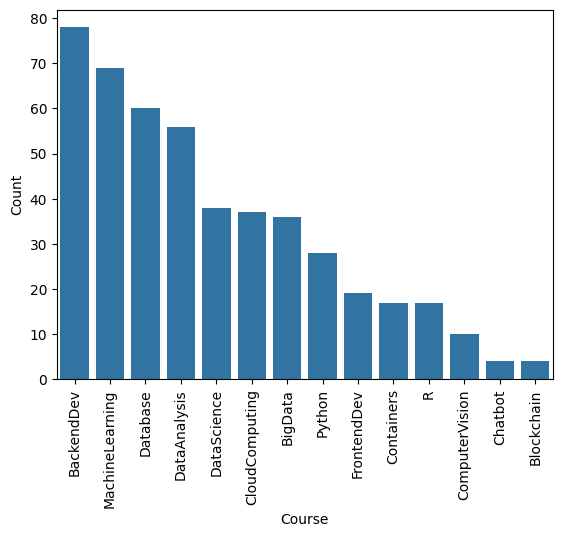

In [ ]:
# Use seaborn barplot or other plot methods to plot course genre counts using a barchart. The x-axis is the course genre and the y-axis is the course count per genre.
# You can use sns.barplot(x=genre_sums.index, y="Count", data=genre_sums) to create your plot. you can rotate your labels by using plot.set_xticklabels(plot.get_xticklabels(),rotation = 90) method.

sns.barplot(x=course_count_per_genre.index, y="Count", data=course_count_per_genre)
plt.xticks(rotation=90)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'BackendDev'),
  Text(1, 0, 'MachineLearning'),
  Text(2, 0, 'Database'),
  Text(3, 0, 'DataAnalysis'),
  Text(4, 0, 'DataScience'),
  Text(5, 0, 'CloudComputing'),
  Text(6, 0, 'BigData'),
  Text(7, 0, 'Python'),
  Text(8, 0, 'FrontendDev'),
  Text(9, 0, 'Containers'),
  Text(10, 0, 'R'),
  Text(11, 0, 'ComputerVision'),
  Text(12, 0, 'Chatbot'),
  Text(13, 0, 'Blockchain')])

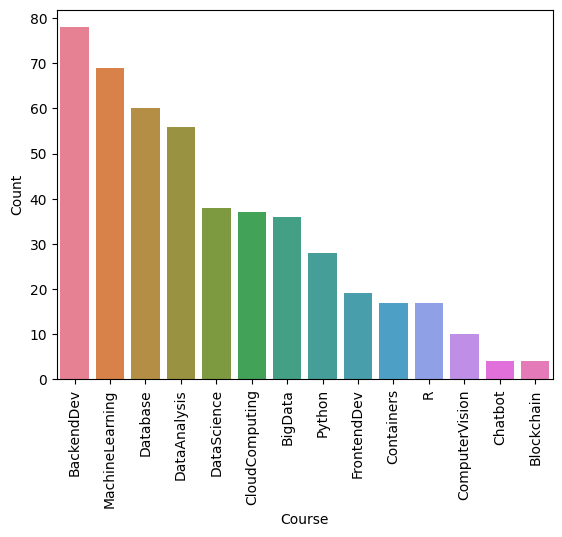

In [ ]:
# above chart in color form

sns.barplot(x=course_count_per_genre.index, y="Count", data=course_count_per_genre,
            hue=course_count_per_genre.index,
            dodge=False, palette=sns.color_palette("husl", len(course_count_per_genre)))
plt.xticks(rotation=90)

###  TASK: Analyze Course Enrollments


In [ ]:
# Let's first take a look at the course enrollments dataset.

ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing the ratings given by the user.


In [ ]:
ratings_df['rating'].unique()

array([5, 3, 4])

The **rating** column consists of three potential values:

- A rating of <code>5</code> signifies that users who have enrolled in the course find it excellent and have given it the highest rating, thus recommending it to other learners.

- A rating of <code>4</code>, indicates that the enrolled users perceive the course as good and will recommend to the other learners,but suggest minor improvements.

- A rating of <code>3</code>indicates that enrolled users find the course below expectations and need significant modifications.

In [ ]:
# Let's see how many ratings we have in the dataset:

ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:


In [ ]:
# Apply Pandas' groupby() and size() method on the user column to aggregate the rating count for each user, then report the total number of users after aggregation.
# You can use ratings_df.groupby('user') to group by user and then .size() method to aggregate the rating count

user_rating_count = ratings_df.groupby('user').size()

user_rating_count.shape[0]

33901

After the aggregation, you should get a new dataframe showing the rating count for each user. For example, user 4 rated 44 items and user 2 rated 61 items. Next, let's try to get some summary statistics and visualizations from the user ratings count dataframe.


In [ ]:
# Use describe() to report the statistics summary of the user enrollments.

user_rating_count.describe()

,0
count,33901.000000
mean,6.881980
std,5.823548
min,1.000000
25%,2.000000
50%,6.000000
75%,9.000000
max,61.000000


<Axes: >

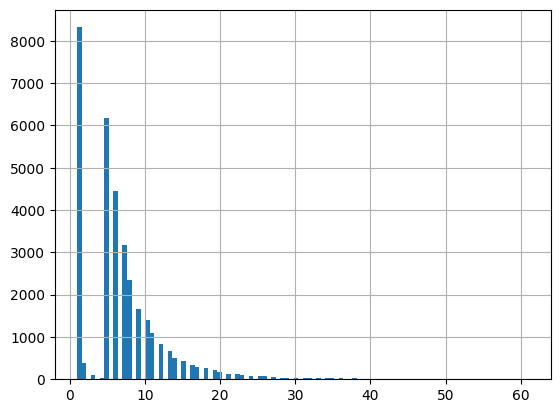

In [ ]:
# We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.
# Plot the histogram of user rating counts. use .hist() command on yout data set

user_rating_count.hist(bins=100)

### Task: Find the Top-20 Most Popular Courses

Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.


In [ ]:
# Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.
# You can use .groupby(['item']).size().reset_index() on the ratings_df to get the aggregated ratings count then you can apply .columns=['course', 'Ratings'] to set the proper column names. Then apply .sort_values(by='Ratings', ascending=False).reset_index(drop=True). Don't forger to choose the top 20 courses.

popular_courses = ratings_df.groupby(['item']).size().reset_index()
popular_courses.columns=['course', 'Ratings']

Now you may only see the item IDs which do not indicate what kind of courses they are. To make it more clear, we need to join the course titles in the course metadata dataset (`course_df`) so that we can identify what the most popular courses are immediately:


In [ ]:
# Use Pandas merge() method to join the course_df (contains the course title column).
# You can use pd.merge() on your dataset with course_df[['COURSE_ID', 'TITLE']], how='left', left_on='course', right_on='COURSE_ID' parameters. Don't forget to choose ['TITLE', 'Ratings'] columns.

popular_courses = pd.merge(course_df[['COURSE_ID', 'TITLE']], popular_courses, how='left', left_on='COURSE_ID', right_on='course')
popular_courses = popular_courses[['TITLE', 'Ratings']]



KeyError: 'course'

In [ ]:
popular_courses.head(20)

,TITLE,Ratings
0,robots are coming build iot apps with watson ...,529.0
1,accelerating deep learning with gpu,270.0
2,consuming restful services using the reactive ...,NaN
3,analyzing big data in r using apache spark,1124.0
4,containerizing packaging and running a sprin...,NaN
5,cloud native security conference data security,1838.0
6,data science bootcamp with r for university pr...,1.0
7,learn how to use docker containers for iterati...,NaN
8,scorm test course,14.0
9,create your first mongodb database,NaN


It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [ ]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

In [ ]:
top = 0

In [ ]:
# Get the percentage of the top-20 course enrollments.
# You can use sum() command on top_courses['Ratings'].values to get top-20 course enrollements sum.

top = popular_courses['Ratings'].values.sum()
top

nan

In [ ]:
# You can use sum() command on top_courses['Ratings'].values to get top-20 course enrollements sum.

total = ratings_df.shape[0]

In [ ]:
print(f"Percentage of the top course enrollments {round((top * 100)/total, 2)}%")

Percentage of the top course enrollments nan%
